In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.font_manager import FontProperties

In [3]:
font_path = "/home/sg666/MeMDLM/MeMDLM/src/utils/ubuntu_font/"

regular_font_path = os.path.join(font_path + 'Ubuntu-Regular.ttf')
bold_font_path = os.path.join(font_path + 'Ubuntu-Bold.ttf')
italic_font_path = os.path.join(font_path + 'Ubuntu-Italic.ttf')
bold_italic_font_path = os.path.join(font_path + 'Ubuntu-BoldItalic.ttf')

# Load the font properties
regular_font = FontProperties(fname=regular_font_path)
bold_font = FontProperties(fname=bold_font_path)
italic_font = FontProperties(fname=italic_font_path)
bold_italic_font = FontProperties(fname=bold_italic_font_path)

# Add the fonts to the font manager
fm.fontManager.addfont(regular_font_path)
fm.fontManager.addfont(bold_font_path)
fm.fontManager.addfont(italic_font_path)
fm.fontManager.addfont(bold_italic_font_path)

# Set the font family globally to Ubuntu
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = regular_font.get_name()
plt.rcParams['mathtext.it'] = italic_font.get_name()
plt.rcParams['mathtext.bf'] = bold_font.get_name()

### Unguided infilling

In [158]:
def make_plots(motif: str, metric: str, dfs: list , title: str, filename: str):
    df_combined = pd.concat(dfs, ignore_index=True)

    if motif == "TM":
        plt.figure(figsize=(3, 4)) 
    elif motif == "Soluble":
        plt.figure(figsize=(4,4))

    sns.violinplot(
        x="Model",    
        y=metric,
        data=df_combined,
        inner=None,  
        linewidth=2,  
        width=0.4,  
        scale="width", 
        color="#79D7F0",
        edgecolor="black"
    )

    plt.xlabel("Sequence Source", fontsize=12, fontproperties=bold_font)
    plt.ylabel(metric, fontsize=12, fontproperties=bold_font)

    bold_font.set_size(15) 
    plt.title(title, fontsize=12, fontproperties=bold_font) 

    plt.xticks(fontsize=12, fontproperties=regular_font)

    plt.ylim(0, 1)

    plt.savefig(f'/home/sg666/MeMDLM/MeMDLM/benchmarks/results/infilling/{filename}',
                dpi=300,
                bbox_inches="tight")

    plt.show()

In [2]:
mlm_upper = pd.read_csv("mlm_uppercase.csv")
evo_upper = pd.read_csv("evodiff_uppercase.csv")

mlm_lower = pd.read_csv("mlm_lowercase.csv")
evo_lower = pd.read_csv("evodiff_lowercase.csv")

In [4]:
dfs = {
    "TM": [mlm_upper, evo_upper],
    "Soluble": [mlm_lower, evo_lower]
}

for motif, dfs in dfs.items():
    print(motif)
    for df in dfs:
        print(f"PPL: {df['Pseudo Perplexity'].mean()} + {df['Pseudo Perplexity'].std()}")
        print(f"Cos: {df['Cosine Similarity'].mean()} + {df['Cosine Similarity'].std()}")

TM
PPL: 3.818872727049813 + 2.745471055564687
Cos: 0.7679940691129696 + 0.19255701378877918
PPL: 20.55392348848825 + 65.36806815209816
Cos: 0.7419357959099432 + 0.19957331394823133
Soluble
PPL: 7.028686195096342 + 6.020710603203039
Cos: 0.7775722248468983 + 0.15883974215688806
PPL: 16.9905891423976 + 4.70379197463693
Cos: 0.7769571967353975 + 0.14929485017958866


In [82]:
mlm_upper['Model'] = 'MeMDLM'
mlm_upper['Infill'] = 'Uppercase'

mlm_lower['Model'] = 'MeMDLM'
mlm_lower['Infill'] = 'Lowercase'


evo_upper['Model'] = 'EvoDiff'
evo_upper['Infill'] = 'Uppercase'

evo_lower['Model'] = 'EvoDiff'
evo_lower['Infill'] = 'Lowercase'

In [ ]:
make_plots(
    motif='TM', # TM / Soluble
    metric='Pseudo Perplexity', # Cosine Similarity / Pseudo Perplexity
    dfs=[mlm_upper, evo_upper],
    title='TM (Pseudo Perplexity)',
    filename='scaffolding_soluble_motifs_pseudo_perplexity.png'
)

In [ ]:
make_plots(
    motif='TM', # TM / Soluble
    metric='Cosine Similarity', # Cosine Similarity / Pseudo Perplexity
    dfs=[mlm_upper, evo_upper],
    title='TM (Cosine Similarity)',
    filename='scaffolding_tm_motifs_cos_sim.png'
)

In [ ]:
make_plots(
    motif='Soluble', # TM / Soluble
    metric='Pseudo Perplexity', # Cosine Similarity / Pseudo Perplexity
    dfs=[mlm_lower, evo_lower],
    title='Soluble (Pseudo Perplexity)',
    filename='scaffolding_soluble_motifs_pseudo_perplexity.png'
)

/tmp/ipykernel_3351519/2959772626.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


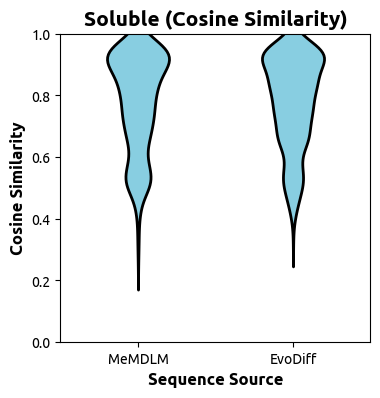

In [ ]:
make_plots(
    motif='Soluble', # TM / Soluble
    metric='Cosine Similarity', # Cosine Similarity / Pseudo Perplexity
    dfs=[mlm_lower, evo_lower],
    title='Soluble (Cosine Similarity)',
    filename='scaffolding_soluble_motifs_cos_sim.png'
)

### Guidance infilling

In [219]:
# Define font paths
font_path = "/home/sg666/MeMDLM/MeMDLM/src/utils/ubuntu_font/"
regular_font_path = os.path.join(font_path, 'Ubuntu-Regular.ttf')
bold_font_path = os.path.join(font_path, 'Ubuntu-Bold.ttf')

# Load font properties
regular_font = FontProperties(fname=regular_font_path)
bold_font = FontProperties(fname=bold_font_path)

In [ ]:
def violin_plot(source, title, columns, column_names, filename):
    df_combined = [np.array(column) for column in columns]

    fig, ax = plt.subplots(figsize=(4, 8))  # Maintain previous size

    # Violin plot with color adjustments
    parts = ax.violinplot(df_combined, showextrema=False, widths=0.4)

    # Customizing violin appearance (color)
    for pc in parts['bodies']:
        pc.set_facecolor("#79D7F0")
        pc.set_edgecolor("black")
        pc.set_alpha(0.8)

    # Setting proper x-ticks dynamically
    ax.set_xticks(range(1, len(column_names) + 1))  
    ax.set_xticklabels(column_names, fontproperties=regular_font, fontsize=12)

    # Labels and title using Ubuntu fonts
    ax.set_xlabel("Sequence Source", fontproperties=bold_font, fontsize=14)
    ax.set_ylabel(source, fontproperties=bold_font, fontsize=14)
    ax.set_title(f"{title.split(' ')[0]} - {source}", fontproperties=bold_font, fontsize=14)

    # Formatting
    ax.set_ylim(0, 100)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.savefig(f'/home/sg666/MeMDLM/MeMDLM/benchmarks/results/infilling/{filename}',
                dpi=300,
                bbox_inches="tight")

    plt.show()

In [230]:
df = pd.read_csv("final_infilling.csv")

df['OG Solubility'] = df['OG Solubility'] * 100
df['Unguided Solubility'] = df['Unguided Solubility'] * 100
df['Optimized Solubility'] = df['Optimized Solubility'] * 100


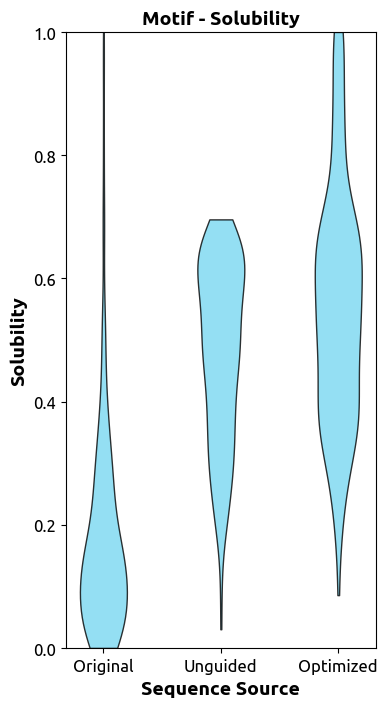

In [ ]:
# Call function with dynamic x-ticks
violin_plot(
    "Solubility", 
    "Motif Scaffolding", 
    [df["OG Solubility"], df['Unguided Solubility'], df["Optimized Solubility"]],
    ["Original", "Unguided", "Optimized"],
    "scaffolding_insoluble_motifs.solubility.png"
)
